# Libraries

In [1]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

# Load the Data

In [3]:
data = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data.drop('Serial No.', axis = 1, inplace = True)

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Look at The Data

In [6]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
data.shape

(400, 8)

In [7]:
# Look at the columns names.
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# Let's check the data, to see if there is duplicate data or not
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [9]:
# We are looking for duplicate rows.
data.duplicated().sum()

0

In [10]:
# Checking for missing values
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
# Use the .info() method to find out how many entries there are.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [12]:
# We are looking for types of the columns in the data.
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [13]:
# To know and see the number of components or the number of sample of each column in this data.
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

# Data Visualization

In [14]:
df = data.copy()
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
# Matrix form for correlation data
drrr= data.corr()
drrr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

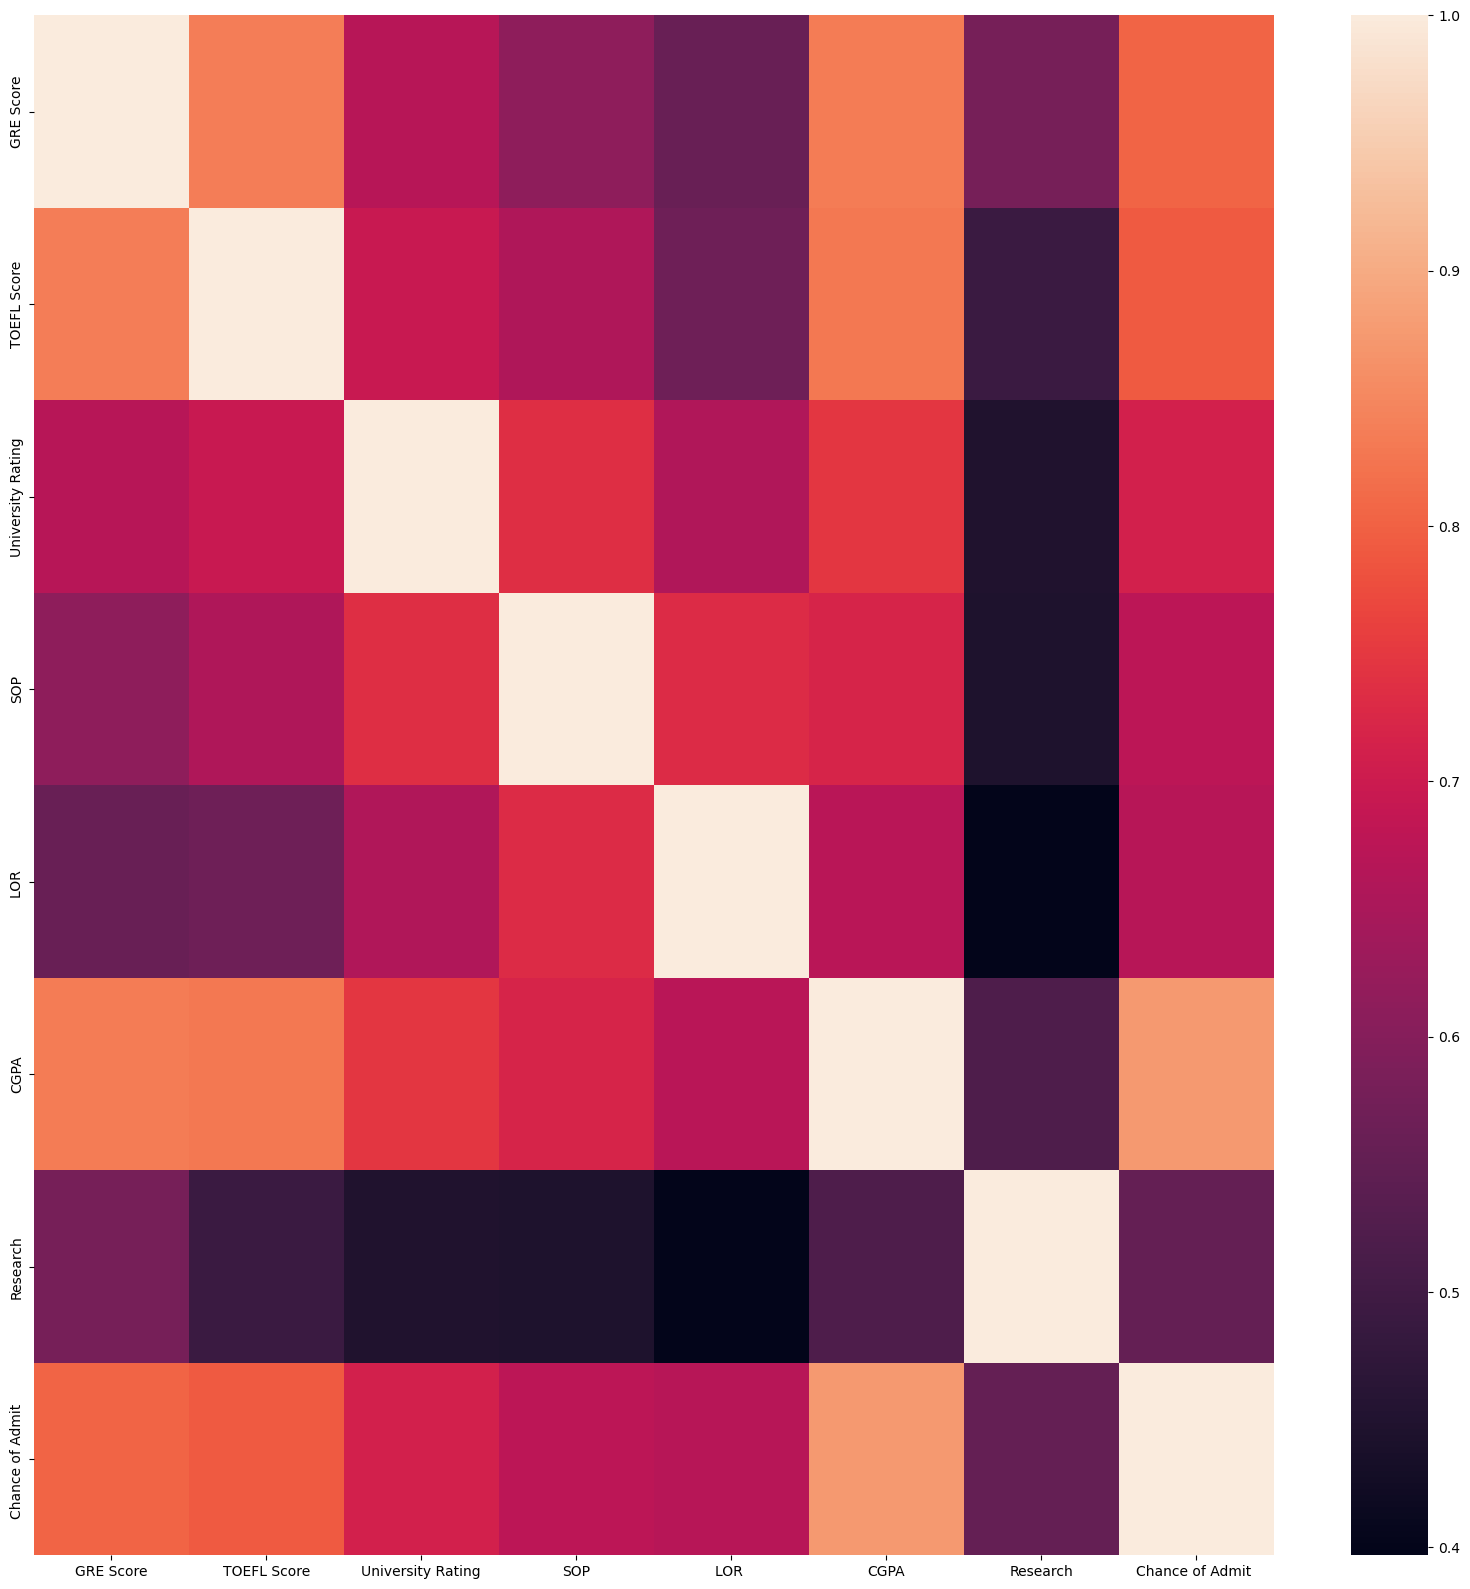

In [16]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<Axes: >

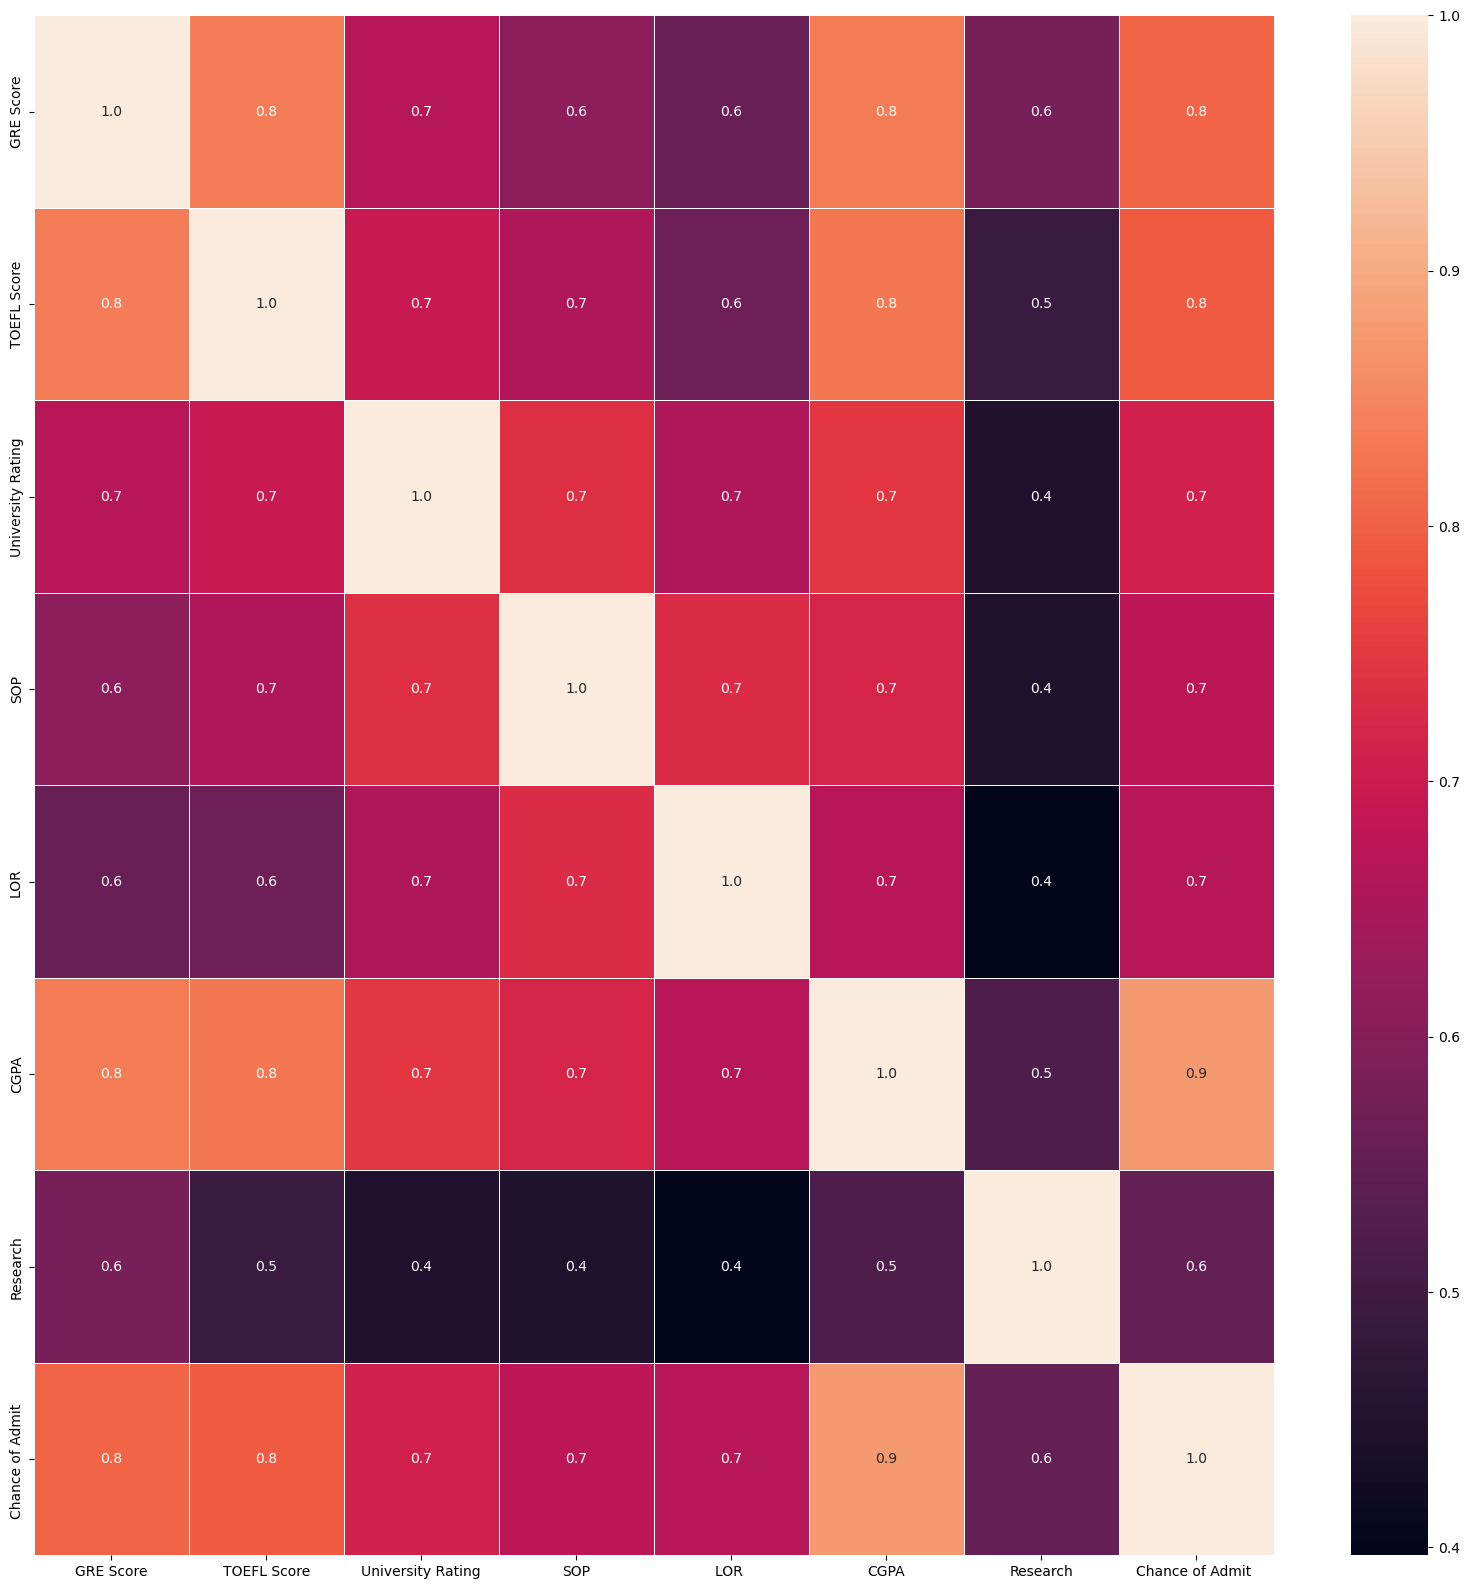

In [17]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

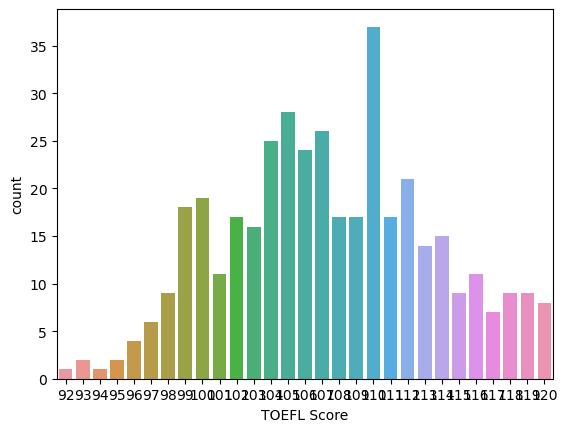

<Figure size 2000x2000 with 0 Axes>

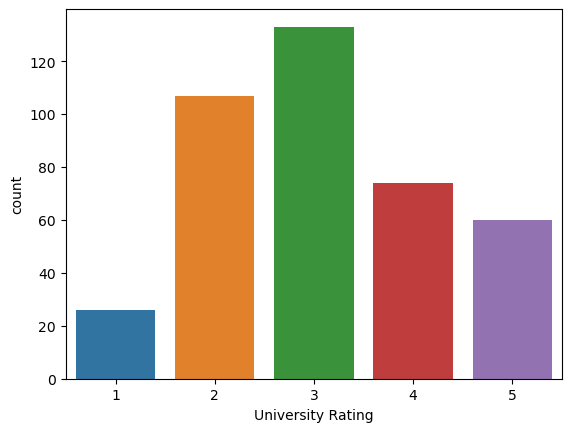

<Figure size 2000x2000 with 0 Axes>

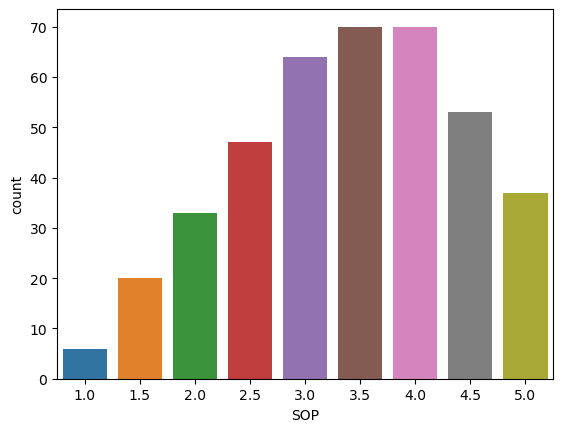

<Figure size 2000x2000 with 0 Axes>

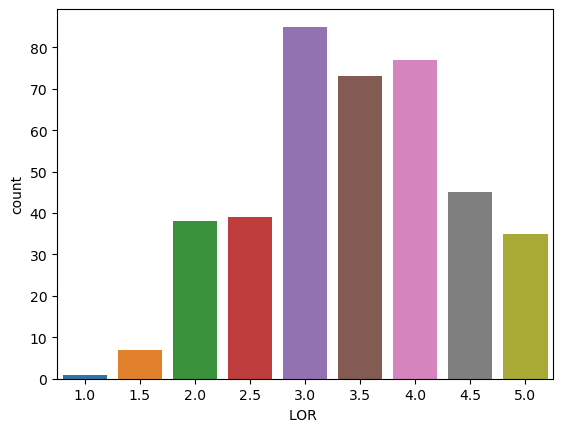

<Figure size 2000x2000 with 0 Axes>

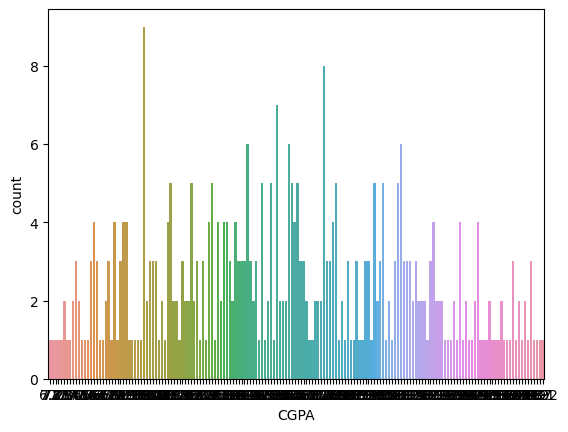

<Figure size 2000x2000 with 0 Axes>

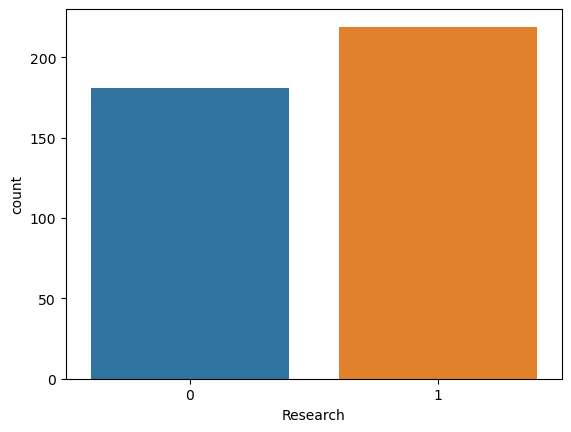

<Figure size 2000x2000 with 0 Axes>

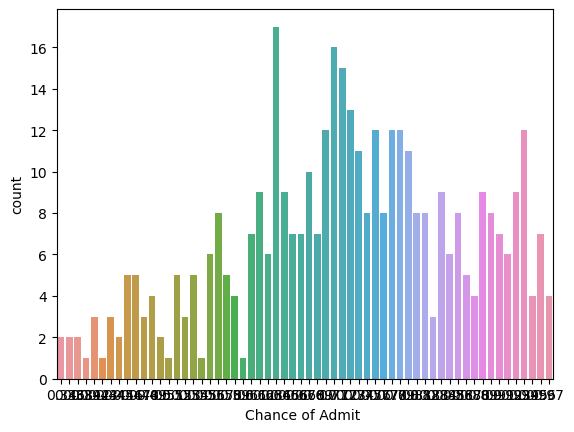

<Figure size 2000x2000 with 0 Axes>

In [18]:
# Original data.
for i in data.loc[:, ~data.columns.isin(["GRE Score", "Chance of Admit"])]:
    f = sns.countplot(x=data[i]);
    plt.figure(figsize=(20,20))
    plt.show()

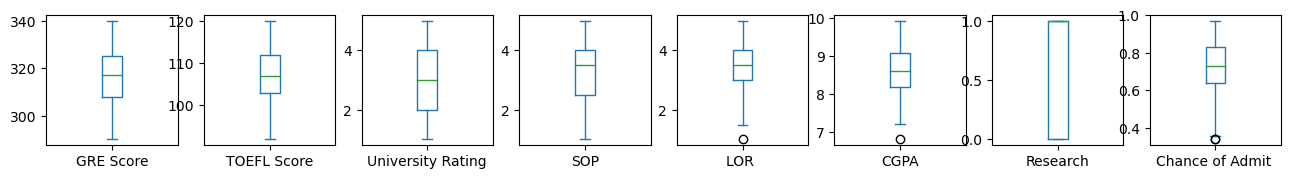

In [19]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

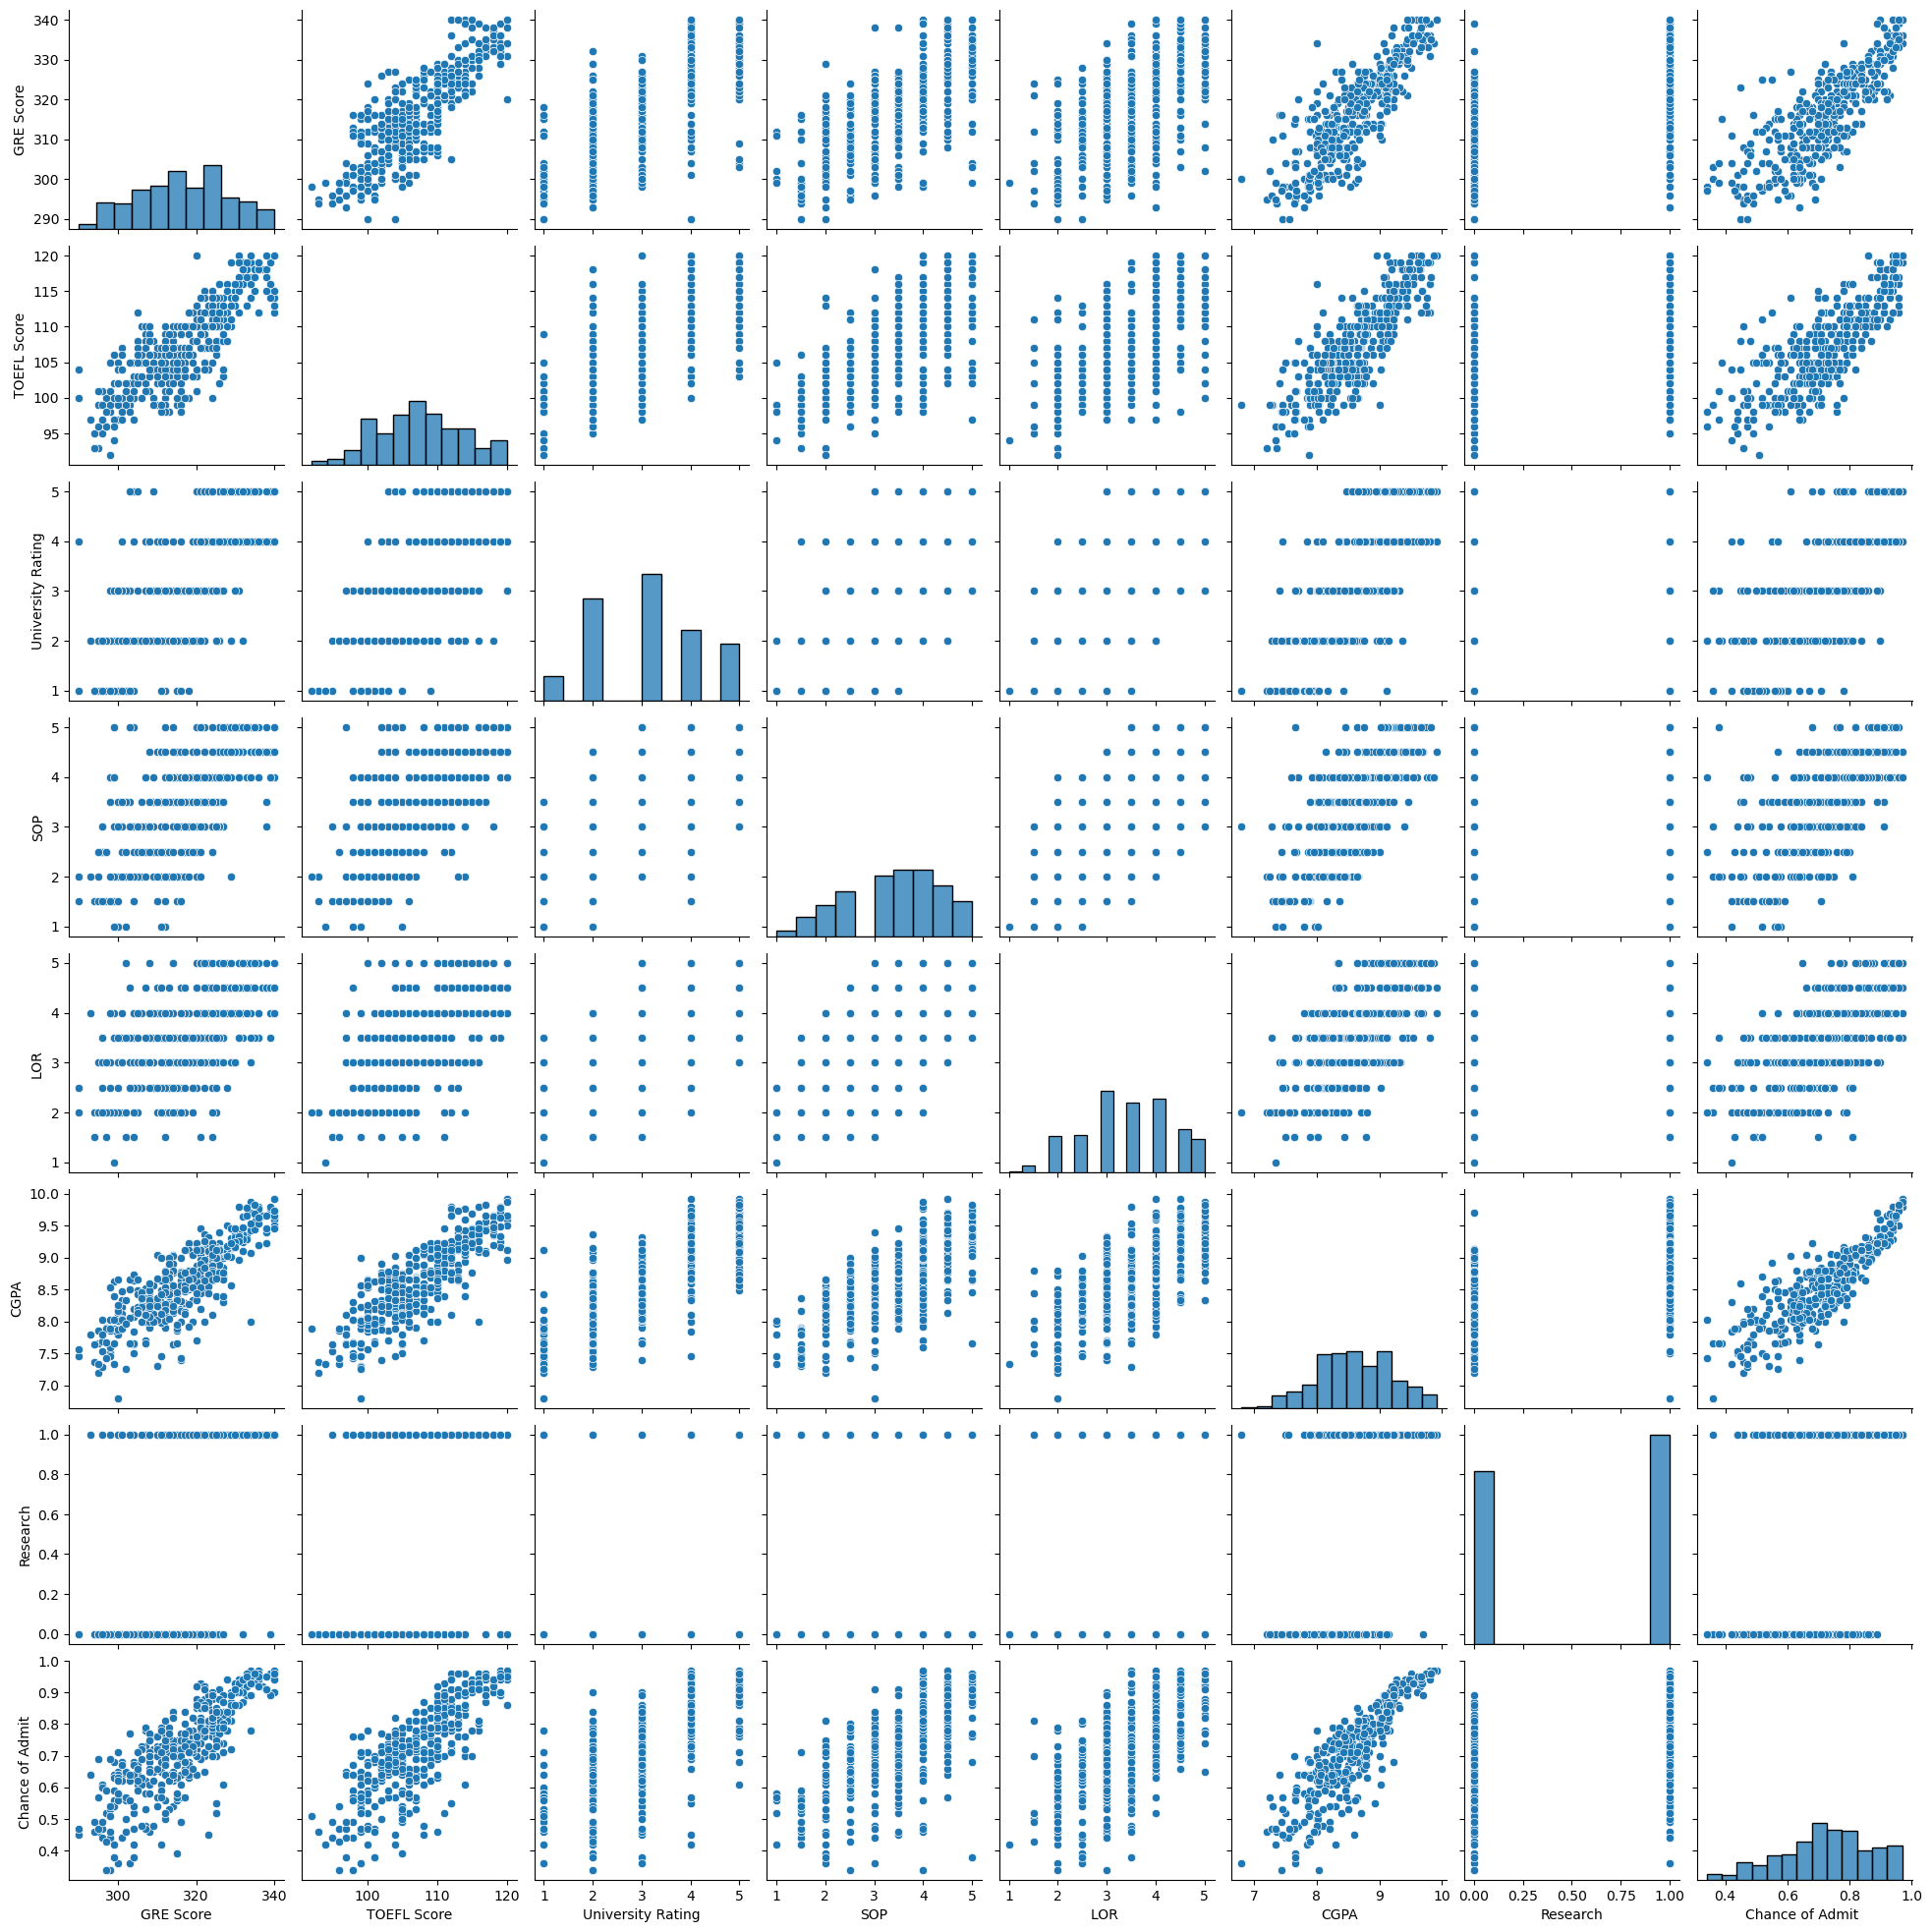

In [20]:
sns.pairplot(df)

# Define dependant & independant

In [21]:
X = data.drop('Chance of Admit ', axis = 1)
y = data['Chance of Admit ']

In [22]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [23]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

# Splitting

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((320, 7), (80, 7), (320,), (80,))

# Preprocessing

## Scale

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train_scaled = scaler.fit_transform(x_train)
X_train_scaled

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [28]:
X_test_scaled = scaler.transform(x_valid)
X_test_scaled

array([[0.22      , 0.42857143, 0.5       , 0.625     , 0.75      ,
        0.42307692, 1.        ],
       [0.42      , 0.35714286, 0.5       , 0.875     , 0.75      ,
        0.58974359, 1.        ],
       [1.        , 0.78571429, 1.        , 0.75      , 0.75      ,
        0.8974359 , 1.        ],
       [0.7       , 0.57142857, 0.75      , 0.875     , 0.75      ,
        0.72435897, 1.        ],
       [0.22      , 0.17857143, 0.25      , 0.5       , 0.5       ,
        0.34615385, 1.        ],
       [1.        , 0.82142857, 1.        , 0.875     , 0.875     ,
        0.84935897, 1.        ],
       [0.14      , 0.14285714, 0.25      , 0.375     , 0.125     ,
        0.34935897, 0.        ],
       [0.26      , 0.25      , 0.5       , 0.25      , 0.375     ,
        0.27564103, 0.        ],
       [0.44      , 0.46428571, 0.25      , 0.25      , 0.375     ,
        0.52884615, 0.        ],
       [0.66      , 0.75      , 0.5       , 0.75      , 0.5       ,
        0.80769231, 1. 

# Model

## Machine Learning Models

### Multiple Linear Regression

In [29]:
Linear_Regression = LinearRegression()

In [30]:
pred_LinearRegression = Linear_Regression.fit(X_train_scaled,y_train)

In [31]:
y_pred_LinearRegression = pred_LinearRegression.predict(X_test_scaled)

In [32]:
r2_score(y_valid, y_pred_LinearRegression)

0.8212082591486991

### Support Vector Regression

In [33]:
SVR_regressor = SVR(kernel = 'rbf')

In [34]:
pred_SVR_regressor = SVR_regressor.fit(X_train_scaled,y_train)

In [35]:
y_pred_SVR_regressor = pred_SVR_regressor.predict(X_test_scaled)

In [36]:
r2_score(y_valid, y_pred_SVR_regressor)

0.7495960564947849

## Deep Learning Model

In [37]:
model = Sequential()

model.add(Dense(40, activation ='relu', input_dim = 7))
model.add(Dense(30, activation ='relu'))
model.add(Dense(20, activation ='relu'))
model.add(Dense(10, activation ='relu'))
model.add(Dense(5, activation ='relu'))
model.add(Dense(1, activation = 'linear'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                320       
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,441
Trainable params: 2,441
Non-trainabl

In [39]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [40]:
history = model.fit(X_train_scaled, y_train, epochs = 150)

Epoch 1/150
10/10 [==============================] - 1s 3ms/step - loss: 0.5241
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4550
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 4/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2980
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.1840
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 9/150
10/10 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 10/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 11/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 12/150
10/10 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 13/150
10/10 [=================

In [41]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [42]:
r2_score(y_valid, y_pred)

0.8286229260528701

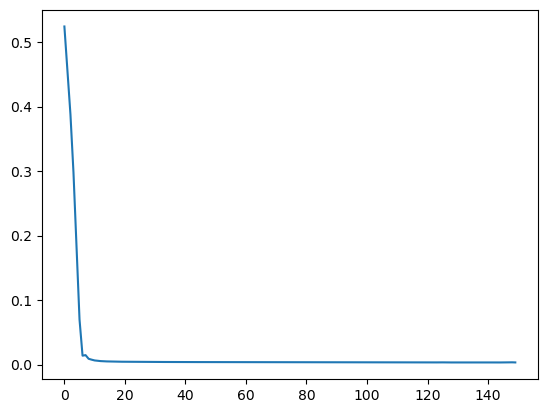

In [44]:
plt.plot(history.history['loss'])